# get streetviews

In [1]:
import streetscape as ss
import os
GSV_API_KEY = os.environ["GSV_API_KEY"]
%matplotlib inline

In [2]:
# create obs points from a small town
# This process utilizes osmnx
import warnings
warnings.filterwarnings('ignore')
obs = ss.create_observation_points('Haywards Heath, UK')

In [3]:
# geopandas dataframe
obs.head()

,obs_point
0,POINT (-0.07368045935899452 50.99541581128218)
1,POINT (-0.07570351613498766 50.9942484577851)
2,POINT (-0.07945484999999999 50.9925742)
3,POINT (-0.08019903650846912 50.99232747194899)
4,POINT (-0.08303430000000001 50.99187965)


5241


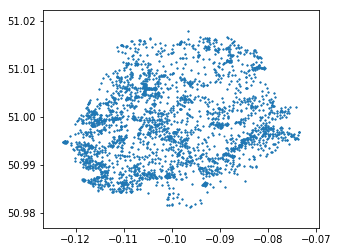

In [4]:
print(len(obs))
obs.plot(markersize=1)

In [7]:
# get 10 images from only last two points
%time
warnings.filterwarnings('ignore')
image_dir = '../data/raw/streetview'
pic_per_obs = 10
ss.get_street_views_from_df(obs.tail(2), image_dir, pic_per_obs=pic_per_obs)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.01 µs


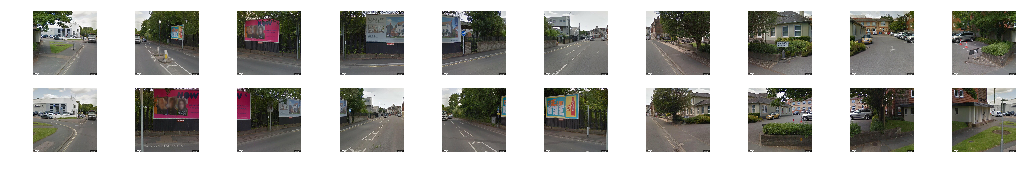

In [8]:
# look at images
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

images = []
for img_path in sorted(glob.glob(image_dir+'/*.jpg'), key=os.path.getmtime):
    images.append(mpimg.imread(img_path))
    
plt.figure(figsize=(18,4))
columns = pic_per_obs
for i, image in enumerate(images):
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.axis('off')
    plt.imshow(image)